# DOE analysis

                                      sum_sq     df          F        PR(>F)
C(PERIOD_MA_1)                    304.617284    2.0   0.269555  7.639641e-01
C(PERIOD_MA_2)                  21292.617284    2.0  18.841811  2.703069e-08
C(PERIOD_MR)                     4732.518519    2.0   4.187800  1.637393e-02
C(THRESHOLD_MR)                 39428.222222    2.0  34.889985  6.234240e-14
C(PERIOD_MA_1):C(PERIOD_MA_2)     743.876543    4.0   0.329128  8.582317e-01
C(PERIOD_MR):C(THRESHOLD_MR)     1484.444444    4.0   0.656792  6.226598e-01
Residual                       127698.222222  226.0        NaN           NaN


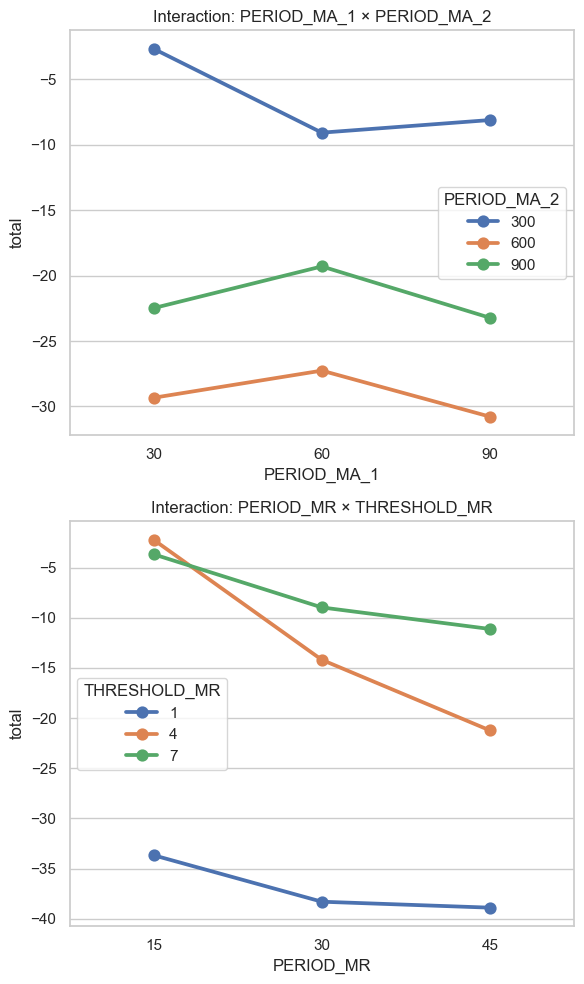

In [5]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# 1. データ読み込み
df = pd.read_csv("../logs/result_20251201162005.csv")

# 2. 因子をカテゴリ化
factor_cols = ["PERIOD_MA_1","PERIOD_MA_2","PERIOD_MR","THRESHOLD_MR"]
for c in factor_cols:
    df[c] = df[c].astype("category")

# 3. ANOVA（注視交互作用のみ）
formula = "total ~ C(PERIOD_MA_1)*C(PERIOD_MA_2) + C(PERIOD_MR)*C(THRESHOLD_MR)"
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# 4. 可視化（主効果＋注視交互作用）
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(6, 10))

pairs = [
    ("PERIOD_MA_1", "PERIOD_MA_2"),
    ("PERIOD_MR", "THRESHOLD_MR"),
]

for ax, (a, b) in zip(axes, pairs):
    sns.pointplot(x=a, y="total", hue=b, data=df, ax=ax, errorbar=None)
    ax.set_title(f"Interaction: {a} × {b}")
    ax.set_xlabel(a)
    ax.set_ylabel("total")

plt.tight_layout()
plt.show()